In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")
%matplotlib inline

In [2]:
donations_13to17=pd.read_pickle('donations1_13to17.pkl')

In [33]:
donations_13to17.shape

(1876468, 196)

In [3]:
for col in donations_13to17.columns:
    print(col)

id
first_gift_year
lapsed_count
recovered_count
max_consec_giving_years
total_giving_years
count_2013
count_2014
count_2015
count_2016
count_2017
count_yr0_x
count_yr1_x
count_yr2_x
count_yr3_x
count_yr4_x
lapsed_amount
recovered_amount
amount_2013
amount_2014
amount_2015
amount_2016
amount_2017
lapsed_amount_2013
lapsed_amount_2014
lapsed_amount_2015
lapsed_amount_2016
lapsed_amount_2017
upgraded_amount_2013
upgraded_amount_2014
upgraded_amount_2015
upgraded_amount_2016
upgraded_amount_2017
downgraded_amount_2013
downgraded_amount_2014
downgraded_amount_2015
downgraded_amount_2016
downgraded_amount_2017
amount_yr0
amount_yr1
amount_yr2
amount_yr3
amount_yr4
count_yr0_y
count_yr1_y
count_yr2_y
count_yr3_y
count_yr4_y
lapsed_amount_yr0
lapsed_amount_yr1
lapsed_amount_yr2
lapsed_amount_yr3
lapsed_amount_yr4
upgraded_amount_yr0
upgraded_amount_yr1
upgraded_amount_yr2
upgraded_amount_yr3
upgraded_amount_yr4
downgraded_amount_yr0
downgraded_amount_yr1
downgraded_amount_yr2
downgraded_amount

In [4]:
donations_13to17.head()

,id,first_gift_year,lapsed_count,recovered_count,max_consec_giving_years,total_giving_years,count_2013,count_2014,count_2015,count_2016,...,amount_06_yr4,amount_07_yr4,amount_08_yr4,amount_09_yr4,amount_10_yr4,amount_11_yr4,amount_12_yr4,years_donated,perc_years_donated,donor_profile
0,1f4b5b6e68445c6c4a0509b3aca93f38,2015-01-01,4,4,4,4,0,0,42,64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0.8,repeat
1,4aaab6d244bf3599682239ed5591af8a,2016-01-01,2,1,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.2,one_time
2,0b0765dc9c759adc48a07688ba25e94e,2015-01-01,3,2,2,2,0,0,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0.4,repeat
3,377944ad61f72d800b25ec1862aec363,2016-01-01,2,1,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.2,one_time
4,6d5b22d39e68c656071a842732c63a0c,2015-01-01,4,3,2,3,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0.6,repeat


### Information about the donors

In [5]:
cohort13=pd.read_pickle('cohort13.pkl')
cohort14=pd.read_pickle('cohort14.pkl')
cohort15=pd.read_pickle('cohort15.pkl')
cohort16=pd.read_pickle('cohort16.pkl')
cohort17=pd.read_pickle('cohort17.pkl')

In [6]:
# number of donors per year (regardless of whether donor is new or old)
no_donors_2013 = donations_13to17.query('amount_2013 > 0').count()['id']
no_donors_2014 = donations_13to17.query('amount_2014 > 0').count()['id']
no_donors_2015 = donations_13to17.query('amount_2015 > 0').count()['id']
no_donors_2016 = donations_13to17.query('amount_2016 > 0').count()['id']
no_donors_2017 = donations_13to17.query('amount_2017 > 0').count()['id']
no_donors_overall = donations_13to17.id.count()

In [7]:
no_donations_2013 = donations_13to17['count_2013'].sum()
no_donations_2014 = donations_13to17['count_2014'].sum()
no_donations_2015 = donations_13to17['count_2015'].sum()
no_donations_2016 = donations_13to17['count_2016'].sum()
no_donations_2017 = donations_13to17['count_2017'].sum()
no_donations_overall = donations_13to17.count_total.sum()

In [8]:
amt_donated_2013 = donations_13to17['amount_2013'].sum()
amt_donated_2014 = donations_13to17['amount_2014'].sum()
amt_donated_2015 = donations_13to17['amount_2015'].sum()
amt_donated_2016 = donations_13to17['amount_2016'].sum()
amt_donated_2017 = donations_13to17['amount_2017'].sum()
amt_donated_overall = donations_13to17.amount_total.sum()

In [9]:
avg_amt_per_donor_2013 = amt_donated_2013/no_donors_2013
avg_amt_per_donor_2014 = amt_donated_2014/no_donors_2014
avg_amt_per_donor_2015 = amt_donated_2015/no_donors_2015
avg_amt_per_donor_2016 = amt_donated_2016/no_donors_2016
avg_amt_per_donor_2017 = amt_donated_2017/no_donors_2017
avg_amt_per_donor_overall = amt_donated_overall/no_donors_overall

In [10]:
max_amt_by_single_donor_2013 = donations_13to17['amount_2013'].max()
max_amt_by_single_donor_2014 = donations_13to17['amount_2014'].max()
max_amt_by_single_donor_2015 = donations_13to17['amount_2015'].max()
max_amt_by_single_donor_2016 = donations_13to17['amount_2016'].max()
max_amt_by_single_donor_2017 = donations_13to17['amount_2017'].max()
max_amt_by_single_donor_overall = donations_13to17['amount_total'].max()

In [11]:
onetime_donors = donations_13to17[(donations_13to17['total_giving_years'] == 1)]

In [12]:
onetime_donors.shape

(1547304, 188)

In [13]:
repeat_donors = donations_13to17[(donations_13to17['total_giving_years'] > 1) ]

In [14]:
repeat_donors.shape

(329164, 188)

In [15]:
no_onetime_donors = len(onetime_donors.id.unique())
no_repeat_donors = len(repeat_donors.id.unique())
perc_onetime_donors= no_onetime_donors/no_donors_overall
perc_repeat_donors = no_repeat_donors/no_donors_overall

In [16]:
# number of new donors that year / number of donors per cohort class
no_new_donors_2013 = donations_13to17.query("first_gift_year == '2013-01-01'").count()['id'] 
no_new_donors_2014 = donations_13to17.query("first_gift_year == '2014-01-01'").count()['id'] 
no_new_donors_2015 = donations_13to17.query("first_gift_year == '2015-01-01'").count()['id'] 
no_new_donors_2016 = donations_13to17.query("first_gift_year == '2016-01-01'").count()['id'] 
no_new_donors_2017 = donations_13to17.query("first_gift_year == '2017-01-01'").count()['id']  

In [17]:
# number of repeat/returning donors
no_repeat_donors_2013 = no_donors_2013-no_new_donors_2013
no_repeat_donors_2014 = no_donors_2014-no_new_donors_2014
no_repeat_donors_2015 = no_donors_2015-no_new_donors_2015
no_repeat_donors_2016 = no_donors_2016-no_new_donors_2016
no_repeat_donors_2017 = no_donors_2017-no_new_donors_2017

In [18]:
#n/a not enough data  retention_rate_13 = no_repeat_donors_13/(no_repeat_donors_13+no_donors_lapsed_13)
retention_rate_2014 = no_repeat_donors_2014/(no_donors_2013)
retention_rate_2015 = no_repeat_donors_2015/(no_donors_2014)
retention_rate_2016 = no_repeat_donors_2016/(no_donors_2015)
retention_rate_2017 = no_repeat_donors_2017/(no_donors_2016)

In [19]:
no_donors_lapsed_2014 = donations_13to17[(donations_13to17['amount_2013'] > 0) & (donations_13to17['amount_2014'] == 0)].count()['id']
no_donors_lapsed_2015 = donations_13to17[(donations_13to17['amount_2014'] > 0) & (donations_13to17['amount_2015'] == 0)].count()['id']
no_donors_lapsed_2016 = donations_13to17[(donations_13to17['amount_2015'] > 0) & (donations_13to17['amount_2016'] == 0)].count()['id']
no_donors_lapsed_2017 = donations_13to17[(donations_13to17['amount_2016'] > 0) & (donations_13to17['amount_2017'] == 0)].count()['id']

In [20]:
donations_13to17.query('amount_2013 == 0 & amount_2014 > 0 & amount_2015 == 0 & amount_2016 == 0 & amount_2017 == 0 & total_giving_years > 1')

,id,first_gift_year,lapsed_count,recovered_count,max_consec_giving_years,total_giving_years,count_2013,count_2014,count_2015,count_2016,...,amount_06_yr4,amount_07_yr4,amount_08_yr4,amount_09_yr4,amount_10_yr4,amount_11_yr4,amount_12_yr4,years_donated,perc_years_donated,donor_profile
587,cd7b8a372e9df9f2b15e817df0647e32,2014-01-01,3,2,1,2,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.4,repeat
881,f032e4065b9f38d2438d012f938420f8,2014-01-01,3,2,1,2,0,3,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.4,repeat
1070,3f78c2aba6d7cd9af0043cd77f02ce0b,2014-01-01,3,2,1,2,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.4,repeat
2870,5d42ebc784dd7851b685eef036bfda22,2014-01-01,3,2,1,2,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.4,repeat
4000,397d46a3a0a5049add54eb05da3e9ddc,2014-01-01,3,2,1,2,0,3,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.4,repeat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921356,84575d5445ce425171e9d8ebbdc1c4b4,2014-01-01,3,2,1,2,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.4,repeat
1938062,5ab992c3bbe0c5ab7858bc08cd7b066a,2014-01-01,3,2,1,2,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.4,repeat
1945118,e58c935b54c64133c739cb6142e2cfc8,2014-01-01,3,2,1,2,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.4,repeat
1949884,eff02c1bc7e54bdce03d9c88e684f208,2014-01-01,3,2,1,2,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.4,repeat


In [21]:
df2013=donations_13to17.query('amount_2013 > 0')

In [22]:
d = {'lapsed_count': ['sum', 'count'], 'recovered_count': ['sum', 'count']}
res = donations_13to17.groupby('first_gift_year').agg(d)
res

lapsed_count         recovered_count        
                         sum   count             sum   count
first_gift_year                                             
2013-01-01            848867  320069          496102  320069
2014-01-01            777916  320673          434887  320673
2015-01-01            809987  355137          445042  355137
2016-01-01            956072  445598          520809  445598
2017-01-01            869982  434991          464981  434991

In [23]:
print(f'Repeat donors')
print(f'Count: ', f'{repeat_donors.id.count():,.0f}')
print(f'% total count: ', f'{repeat_donors.id.count()/no_donors_overall:.2%}')
print(f'Amount donated: ', f'$', f'{repeat_donors.amount_total.sum():,.0f}')
print(f'% total amount: ', f'{repeat_donors.amount_total.sum()/amt_donated_overall:.2%}')

Repeat donors
Count:  329,164
% total count:  17.54%
Amount donated:  $ 147,082,157
% total amount:  57.04%


In [24]:
# 1. Overview stats - 2013-2017
print(f'Overview overall 2013-2017')
print(f'# donors:', f'{no_donors_overall:,}')
print(f'# one-time donors:', f'{no_onetime_donors:,}')
print(f'% one-time donors:', f'{perc_onetime_donors:.0%}')
print(f'# repeat donors:', f'{no_repeat_donors:,}')
print(f'% repeat donors:', f'{perc_repeat_donors:.0%}')
print(f'# donations:', f'{no_donations_overall:,}')
print(f'$ donated:', f'$', f"{amt_donated_overall:,.2f}")
print(f'Average $ per donor:', f'$', f'{avg_amt_per_donor_overall:,.2f}')
print(f'Max $ by single donor:', f'$', f'{max_amt_by_single_donor_overall:,.2f}')

Overview overall 2013-2017
# donors: 1,876,468
# one-time donors: 1,547,304
% one-time donors: 82%
# repeat donors: 329,164
% repeat donors: 18%
# donations: 4,247,863
$ donated: $ 257,848,862.50
Average $ per donor: $ 137.41
Max $ by single donor: $ 1,836,958.08


In [25]:
for col in donations_13to17.columns:
    print(col)

id
first_gift_year
lapsed_count
recovered_count
max_consec_giving_years
total_giving_years
count_2013
count_2014
count_2015
count_2016
count_2017
count_yr0_x
count_yr1_x
count_yr2_x
count_yr3_x
count_yr4_x
lapsed_amount
recovered_amount
amount_2013
amount_2014
amount_2015
amount_2016
amount_2017
lapsed_amount_2013
lapsed_amount_2014
lapsed_amount_2015
lapsed_amount_2016
lapsed_amount_2017
upgraded_amount_2013
upgraded_amount_2014
upgraded_amount_2015
upgraded_amount_2016
upgraded_amount_2017
downgraded_amount_2013
downgraded_amount_2014
downgraded_amount_2015
downgraded_amount_2016
downgraded_amount_2017
amount_yr0
amount_yr1
amount_yr2
amount_yr3
amount_yr4
count_yr0_y
count_yr1_y
count_yr2_y
count_yr3_y
count_yr4_y
lapsed_amount_yr0
lapsed_amount_yr1
lapsed_amount_yr2
lapsed_amount_yr3
lapsed_amount_yr4
upgraded_amount_yr0
upgraded_amount_yr1
upgraded_amount_yr2
upgraded_amount_yr3
upgraded_amount_yr4
downgraded_amount_yr0
downgraded_amount_yr1
downgraded_amount_yr2
downgraded_amount

In [26]:
# 2a. By year - 2013
print(f'Year 1 - 2013')
print(f'# donors:', f'{no_donors_2013:,}')
print(f'# new donors:', f'{no_new_donors_2013:,}')
print(f'# repeat donors:', f'{no_repeat_donors_2013:,}')
#print(f'# donors lapsed:', f'n/a')
print(f'Retention rate:', f'n/a')

print(f'$ donated:', f'$', f"{amt_donated_2013:,.0f}")
print(f'# donations:', f'{no_donations_2013:,}')
print(f'Average $ per donor:', f'$', f'{avg_amt_per_donor_2013:,.0f}')
print(f'Max $ by single donor:', f'$', f'{max_amt_by_single_donor_2013:,.0f}')

Year 1 - 2013
# donors: 320,069
# new donors: 320,069
# repeat donors: 0
Retention rate: n/a
$ donated: $ 30,411,764
# donations: 573,067
Average $ per donor: $ 95
Max $ by single donor: $ 442,794


In [27]:
#2b. By year - 2014
print(f'Year 2 - 2014')
print(f'# donors:', f'{no_donors_14:,}')
print(f'# new donors:', f'{no_new_donors_14:,}')
print(f'# repeat donors:', f'{no_repeat_donors_14:,}')
#print(f'# donors lapsed:', f'{no_donors_lapsed_14:,}')
print(f'Retention rate:', f'{no_repeat_donors_14/no_donors_14:.2%}')

print(f'$ donated:', f'$', f"{amt_donated_14:,.0f}")
print(f'# donations:', f'{no_donations_14:,}')
print(f'Average $ per donor:', f'$', f'{avg_amt_per_donor_14:,.0f}')
print(f'Max $ by single donor:', f'$', f'{max_amt_by_single_donor_14:,.0f}')

Year 2 - 2014


NameError: name 'no_donors_14' is not defined

In [65]:
#2c. By year - 2015
print(f'Year 3 - 2015')
print(f'# donors:', f'{no_donors_15:,}')
print(f'# new donors:', f'{no_new_donors_15:,}')
print(f'# repeat donors:', f'{no_repeat_donors_15:,}')
#print(f'# donors lapsed:', f'{no_donors_lapsed_15:,}')
print(f'Retention rate:', f'{no_repeat_donors_15/no_donors_15:.2%}')

print(f'$ donated:', f'$', f"{amt_donated_15:,.0f}")
print(f'# donations:', f'{no_donations_15:,}')
print(f'Average $ per donor:', f'$', f'{avg_amt_per_donor_15:,.0f}')
print(f'Max $ by single donor:', f'$', f'{max_amt_by_single_donor_15:,.0f}')

Year 3 - 2015
# donors: 446,048
# new donors: 355,141
# repeat donors: 90,907
Retention rate: 20.38%
$ donated: $ 50,488,301
# donations: 783,362
Average $ per donor: $ 113
Max $ by single donor: $ 346,566


In [66]:
#2d. By year - 2016')
print(f'Year 4 - 2016')
print(f'# donors:', f'{no_donors_16:,}')
print(f'# new donors:', f'{no_new_donors_16:,}')
print(f'# repeat donors:', f'{no_repeat_donors_16:,}')
print(f'# donors lapsed:', f'{no_donors_lapsed_16:,}')
print(f'Retention rate:', f'{no_repeat_donors_16/no_donors_16:.2%}')

print(f'$ donated:', f'$', f"{amt_donated_16:,.0f}")
print(f'# donations:', f'{no_donations_16:,}')
print(f'Average $ per donor:', f'$', f'{avg_amt_per_donor_16:,.0f}')
print(f'Max $ by single donor:', f'$', f'{max_amt_by_single_donor_16:,.0f}')

Year 4 - 2016
# donors: 555,843
# new donors: 445,598
# repeat donors: 110,245
# donors lapsed: 365,597
Retention rate: 19.83%
$ donated: $ 62,652,159
# donations: 957,265
Average $ per donor: $ 113
Max $ by single donor: $ 294,947


In [67]:
#2e. By year - 2017
print(f'Year 5 - 2017')
print(f'# donors:', f'{no_donors_17:,}')
print(f'# new donors:', f'{no_new_donors_17:,}')
print(f'# repeat donors:', f'{no_repeat_donors_17:,}')
print(f'# donors lapsed:', f'{no_donors_lapsed_17:,}')
print(f'Retention rate:', f'{no_repeat_donors_17/no_donors_17:.2%}')

print(f'$ donated:', f'$', f"{amt_donated_17:,.0f}")
print(f'# donations:', f'{no_donations_17:,}')
print(f'Average $ per donor:', f'$', f'{avg_amt_per_donor_17:,.0f}')
print(f'Max $ by single donor:', f'$', f'{max_amt_by_single_donor_17:,.0f}')

Year 5 - 2017
# donors: 574,599
# new donors: 434,994
# repeat donors: 139,605
# donors lapsed: 456,148
Retention rate: 24.30%
$ donated: $ 72,872,034
# donations: 1,190,542
Average $ per donor: $ 127
Max $ by single donor: $ 634,710


In [41]:
yr2013 = donations_13to17.query('amount_2013 > 0')

In [42]:
yr2013.count()

id                         320069
first_gift_year            320069
lapsed_count               320069
recovered_count            320069
max_consec_giving_years    320069
                            ...  
amount_11_yr4              320069
amount_12_yr4              320069
years_donated              320069
perc_years_donated         320069
donor_profile              320069
Length: 188, dtype: int64

In [43]:
for col in yr2013.columns:
    print(col)

id
first_gift_year
lapsed_count
recovered_count
max_consec_giving_years
total_giving_years
count_2013
count_2014
count_2015
count_2016
count_2017
count_yr0_x
count_yr1_x
count_yr2_x
count_yr3_x
count_yr4_x
lapsed_amount
recovered_amount
amount_2013
amount_2014
amount_2015
amount_2016
amount_2017
lapsed_amount_2013
lapsed_amount_2014
lapsed_amount_2015
lapsed_amount_2016
lapsed_amount_2017
upgraded_amount_2013
upgraded_amount_2014
upgraded_amount_2015
upgraded_amount_2016
upgraded_amount_2017
downgraded_amount_2013
downgraded_amount_2014
downgraded_amount_2015
downgraded_amount_2016
downgraded_amount_2017
amount_yr0
amount_yr1
amount_yr2
amount_yr3
amount_yr4
count_yr0_y
count_yr1_y
count_yr2_y
count_yr3_y
count_yr4_y
lapsed_amount_yr0
lapsed_amount_yr1
lapsed_amount_yr2
lapsed_amount_yr3
lapsed_amount_yr4
upgraded_amount_yr0
upgraded_amount_yr1
upgraded_amount_yr2
upgraded_amount_yr3
upgraded_amount_yr4
downgraded_amount_yr0
downgraded_amount_yr1
downgraded_amount_yr2
downgraded_amount

In [44]:
yr2013.head()

,id,first_gift_year,lapsed_count,recovered_count,max_consec_giving_years,total_giving_years,count_2013,count_2014,count_2015,count_2016,...,amount_06_yr4,amount_07_yr4,amount_08_yr4,amount_09_yr4,amount_10_yr4,amount_11_yr4,amount_12_yr4,years_donated,perc_years_donated,donor_profile
6,8a1875762c85932fff192ea126ccdff2,2013-01-01,2,1,1,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.2,one_time
7,a3f070e439d52de72ca62dc41f9b16a4,2013-01-01,2,1,1,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.2,one_time
8,bd323208dc78b1c74b62664b768f3176,2013-01-01,4,3,3,3,2,2,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.6,repeat
9,6dd6113f89f2766d3b0707ef2a46260c,2013-01-01,4,3,3,3,19,7,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.6,repeat
10,391f14831940fc7bc41df2cd7fb06030,2013-01-01,2,1,1,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.2,one_time


In [45]:
mult_yr2013=yr2013.query('count_2013 > 1')

In [46]:
mult_yr2013.count()

id                         63584
first_gift_year            63584
lapsed_count               63584
recovered_count            63584
max_consec_giving_years    63584
                           ...  
amount_11_yr4              63584
amount_12_yr4              63584
years_donated              63584
perc_years_donated         63584
donor_profile              63584
Length: 188, dtype: int64

In [47]:
mult_yr2013.head()

,id,first_gift_year,lapsed_count,recovered_count,max_consec_giving_years,total_giving_years,count_2013,count_2014,count_2015,count_2016,...,amount_06_yr4,amount_07_yr4,amount_08_yr4,amount_09_yr4,amount_10_yr4,amount_11_yr4,amount_12_yr4,years_donated,perc_years_donated,donor_profile
8,bd323208dc78b1c74b62664b768f3176,2013-01-01,4,3,3,3,2,2,1,0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.00,3,0.6,repeat
9,6dd6113f89f2766d3b0707ef2a46260c,2013-01-01,4,3,3,3,19,7,1,0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.00,3,0.6,repeat
12,499496888e927737acdb1d1dd4421dd4,2013-01-01,3,2,2,2,2,1,0,0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.00,2,0.4,repeat
22,309bbe105f70465277576733c0d451b3,2013-01-01,6,5,5,5,9,11,18,20,...,0.0,15.0,20.0,0.0,10.00,10.0,0.00,5,1.0,repeat
26,4b4b9cd2431fcc83cce2625fc723db67,2013-01-01,6,6,6,6,7,17,60,82,...,0.0,0.0,0.0,0.0,711.63,0.0,2963.61,5,1.0,repeat


In [51]:
yr2013.query('downgraded_amount_2013 > 0')

,id,first_gift_year,lapsed_count,recovered_count,max_consec_giving_years,total_giving_years,count_2013,count_2014,count_2015,count_2016,...,amount_06_yr4,amount_07_yr4,amount_08_yr4,amount_09_yr4,amount_10_yr4,amount_11_yr4,amount_12_yr4,years_donated,perc_years_donated,donor_profile
8,bd323208dc78b1c74b62664b768f3176,2013-01-01,4,3,3,3,2,2,1,0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.0,3,0.6,repeat
9,6dd6113f89f2766d3b0707ef2a46260c,2013-01-01,4,3,3,3,19,7,1,0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.0,3,0.6,repeat
22,309bbe105f70465277576733c0d451b3,2013-01-01,6,5,5,5,9,11,18,20,...,0.0,15.0,20.00,0.00,10.00,10.00,0.0,5,1.0,repeat
88,9f3d62fb6f0a383d9fd993bd832ab6d5,2013-01-01,6,5,3,5,9,2,2,0,...,0.0,5.0,10.00,15.00,5.00,5.00,5.0,4,0.8,repeat
90,0e345dcdef0d2a36c9bd17bf1ac3e10a,2013-01-01,6,6,6,6,2297,1367,657,155,...,50.0,260.0,373.49,125.88,236.35,141.05,221.0,5,1.0,repeat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995618,322a910a93741e7bc778d34101cc0488,2013-01-01,3,2,2,2,1,1,0,0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.0,2,0.4,repeat
2000323,38ac7a02f9e1782ad9e3babc9d7ae5c7,2013-01-01,3,2,2,2,1,1,0,0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.0,2,0.4,repeat
2001227,bc489a1a95e882971ad70008c22d9e3f,2013-01-01,3,2,2,2,2,1,0,0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.0,2,0.4,repeat
2022912,5645fc9c0e2e8a5bd0fcd7edbbf68c91,2013-01-01,3,2,2,2,1,1,0,0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.0,2,0.4,repeat


### YEAR info using 2013-2017 dataset

In [5]:
yr2013=donations_13to17.query('amount_2013 > 0')

In [6]:
yr2013.head()

,id,first_gift_year,lapsed_count,recovered_count,max_consec_giving_years,total_giving_years,count_2013,count_2014,count_2015,count_2016,...,amount_06_yr4,amount_07_yr4,amount_08_yr4,amount_09_yr4,amount_10_yr4,amount_11_yr4,amount_12_yr4,years_donated,perc_years_donated,donor_profile
6,8a1875762c85932fff192ea126ccdff2,2013-01-01,2,1,1,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.2,one_time
7,a3f070e439d52de72ca62dc41f9b16a4,2013-01-01,2,1,1,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.2,one_time
8,bd323208dc78b1c74b62664b768f3176,2013-01-01,4,3,3,3,2,2,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.6,repeat
9,6dd6113f89f2766d3b0707ef2a46260c,2013-01-01,4,3,3,3,19,7,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.6,repeat
10,391f14831940fc7bc41df2cd7fb06030,2013-01-01,2,1,1,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.2,one_time


In [7]:
yr_info = donations_13to17

In [8]:
#2013_behavior
yr_info['behavior_2013'] = np.where(yr_info['amount_2013'] > 0, "new", "none")

In [9]:
yr_info.groupby('behavior_2013').count()['id']

behavior_2013
new      320069
none    1556399
Name: id, dtype: int64

In [10]:
#2014_behavior
conditions = [(yr_info['amount_2013'] == 0) & (yr_info['amount_2014'] > 0),
              (yr_info['amount_2013'] > 0) & (yr_info['amount_2013'] > 0) & (yr_info['amount_2013'] < yr_info['amount_2014']),
              (yr_info['amount_2013'] > 0) & (yr_info['amount_2014'] > 0) & (yr_info['amount_2013'] > yr_info['amount_2014']),
              (yr_info['amount_2013'] > 0) & (yr_info['amount_2014'] > 0) & (yr_info['amount_2013'] == yr_info['amount_2014']),
              (yr_info['amount_2013'] > 0) & (yr_info['amount_2014'] == 0)]
              
choices = ['new', 'upgrade', 'downgrade', 'maintain', 'lapse_new']

yr_info['behavior_2014'] = np.select(conditions, choices, default='none')

In [11]:
#2015_behavior
conditions = [(yr_info['amount_2013'] == 0) & (yr_info['amount_2014'] == 0) & (yr_info['amount_2015'] > 0),
              (yr_info['amount_2014'] > 0) & (yr_info['amount_2015'] > 0) & (yr_info['amount_2014'] < yr_info['amount_2015']),
              (yr_info['amount_2014'] > 0) & (yr_info['amount_2015'] > 0) & (yr_info['amount_2014'] > yr_info['amount_2015']),
              (yr_info['amount_2014'] > 0) & (yr_info['amount_2015'] > 0) & (yr_info['amount_2014'] == yr_info['amount_2015']),
              (yr_info['amount_2013'] == 0) & (yr_info['amount_2014'] > 0) & (yr_info['amount_2015'] == 0),
              (yr_info['amount_2013'] > 0) & (yr_info['amount_2014'] > 0) & (yr_info['amount_2015'] == 0),              
              (yr_info['amount_2013'] > 0) & (yr_info['amount_2014'] == 0) & (yr_info['amount_2015'] > 0)]
              
choices = ['new', 'upgrade', 'downgrade', 'maintain', 'lapse_new', 'lapse_repeat', 'recover']

yr_info['behavior_2015'] = np.select(conditions, choices, default='none')

In [12]:
#2016_behavior
conditions = [(yr_info['amount_2013'] == 0) & (yr_info['amount_2014'] == 0) & (yr_info['amount_2015'] == 0) & (yr_info['amount_2016'] > 0),
              (yr_info['amount_2015'] > 0) & (yr_info['amount_2016'] > 0) & (yr_info['amount_2015'] < yr_info['amount_2016']),
              (yr_info['amount_2015'] > 0) & (yr_info['amount_2016'] > 0) & (yr_info['amount_2015'] > yr_info['amount_2016']),
              (yr_info['amount_2015'] > 0) & (yr_info['amount_2016'] > 0) & (yr_info['amount_2015'] == yr_info['amount_2016']),
              (yr_info['amount_2013'] == 0) & (yr_info['amount_2014'] == 0) & (yr_info['amount_2015'] > 0) & (yr_info['amount_2016'] == 0),
              ((yr_info['amount_2013'] > 0) | (yr_info['amount_2014'] > 0)) & (yr_info['amount_2015'] > 0) & (yr_info['amount_2016'] == 0),
              ((yr_info['amount_2013'] > 0) | (yr_info['amount_2014'] > 0)) & (yr_info['amount_2015'] == 0) & (yr_info['amount_2016'] > 0)]
              
choices = ['new', 'upgrade', 'downgrade', 'maintain', 'lapse_new', 'lapse_repeat', 'recover']

yr_info['behavior_2016'] = np.select(conditions, choices, default='none')

In [13]:
#2017_behavior
conditions = [(yr_info['amount_2013'] == 0) & (yr_info['amount_2014'] == 0) & (yr_info['amount_2015'] == 0) & (yr_info['amount_2016'] == 0) & (yr_info['amount_2017'] > 0),
              (yr_info['amount_2016'] > 0) & (yr_info['amount_2017'] > 0) & (yr_info['amount_2016'] < yr_info['amount_2017']),
              (yr_info['amount_2016'] > 0) & (yr_info['amount_2017'] > 0) & (yr_info['amount_2016'] > yr_info['amount_2017']),
              (yr_info['amount_2016'] > 0) & (yr_info['amount_2017'] > 0) & (yr_info['amount_2016'] == yr_info['amount_2017']),    
              (yr_info['amount_2013'] == 0) & (yr_info['amount_2014'] == 0) & (yr_info['amount_2015'] == 0) & (yr_info['amount_2016'] > 0) & (yr_info['amount_2017'] == 0),
              ((yr_info['amount_2013'] > 0) | (yr_info['amount_2014'] > 0) | (yr_info['amount_2015'] > 0)) & (yr_info['amount_2016'] > 0) & (yr_info['amount_2017'] == 0),
              ((yr_info['amount_2013'] > 0) | (yr_info['amount_2014'] > 0) | (yr_info['amount_2015'] > 0)) & (yr_info['amount_2016'] == 0) & (yr_info['amount_2017'] > 0)]
              
choices = ['new', 'upgrade', 'downgrade', 'maintain', 'lapse_new', 'lapse_repeat', 'recover']

yr_info['behavior_2017'] = np.select(conditions, choices, default='none')

In [14]:
#giving patterns
conditions = [(yr_info['amount_2013'] >0) & (yr_info['amount_2014'] ==0) & (yr_info['amount_2015']==0) & (yr_info['amount_2016']==0) & (yr_info['amount_2017']== 0) ,
(yr_info['amount_2013'] ==0) & (yr_info['amount_2014'] >0) & (yr_info['amount_2015']==0) & (yr_info['amount_2016']==0) & (yr_info['amount_2017']== 0) ,
(yr_info['amount_2013'] ==0) & (yr_info['amount_2014'] ==0) & (yr_info['amount_2015']>0) & (yr_info['amount_2016']==0) & (yr_info['amount_2017']== 0) ,
(yr_info['amount_2013'] ==0) & (yr_info['amount_2014'] ==0) & (yr_info['amount_2015']==0) & (yr_info['amount_2016']>0) & (yr_info['amount_2017']== 0) ,
(yr_info['amount_2013'] ==0) & (yr_info['amount_2014'] ==0) & (yr_info['amount_2015']==0) & (yr_info['amount_2016']==0) & (yr_info['amount_2017']> 0),
(yr_info['amount_2013'] >0) & (yr_info['amount_2014'] >0) & (yr_info['amount_2015']==0) & (yr_info['amount_2016']==0) & (yr_info['amount_2017']== 0) ,
(yr_info['amount_2013'] >0) & (yr_info['amount_2014'] ==0) & (yr_info['amount_2015']>0) & (yr_info['amount_2016']==0) & (yr_info['amount_2017']== 0) ,
(yr_info['amount_2013'] >0) & (yr_info['amount_2014'] ==0) & (yr_info['amount_2015']==0) & (yr_info['amount_2016']>0) & (yr_info['amount_2017']== 0) ,
(yr_info['amount_2013'] >0) & (yr_info['amount_2014'] ==0) & (yr_info['amount_2015']==0) & (yr_info['amount_2016']==0) & (yr_info['amount_2017']> 0) ,
(yr_info['amount_2013'] ==0) & (yr_info['amount_2014'] >0) & (yr_info['amount_2015']>0) & (yr_info['amount_2016']==0) & (yr_info['amount_2017']== 0) ,
(yr_info['amount_2013'] ==0) & (yr_info['amount_2014'] >0) & (yr_info['amount_2015']==0) & (yr_info['amount_2016']>0) & (yr_info['amount_2017']== 0) ,
(yr_info['amount_2013'] ==0) & (yr_info['amount_2014'] >0) & (yr_info['amount_2015']==0) & (yr_info['amount_2016']==0) & (yr_info['amount_2017']> 0) ,
(yr_info['amount_2013'] ==0) & (yr_info['amount_2014'] ==0) & (yr_info['amount_2015']>0) & (yr_info['amount_2016']>0) & (yr_info['amount_2017']== 0) ,
(yr_info['amount_2013'] ==0) & (yr_info['amount_2014'] ==0) & (yr_info['amount_2015']>0) & (yr_info['amount_2016']==0) & (yr_info['amount_2017']> 0) ,
(yr_info['amount_2013'] ==0) & (yr_info['amount_2014'] ==0) & (yr_info['amount_2015']==0) & (yr_info['amount_2016']>0) & (yr_info['amount_2017']> 0),
(yr_info['amount_2013'] >0) & (yr_info['amount_2014'] >0) & (yr_info['amount_2015']>0) & (yr_info['amount_2016']==0) & (yr_info['amount_2017']== 0) ,
(yr_info['amount_2013'] >0) & (yr_info['amount_2014'] >0) & (yr_info['amount_2015']==0) & (yr_info['amount_2016']>0) & (yr_info['amount_2017']== 0) ,
(yr_info['amount_2013'] >0) & (yr_info['amount_2014'] >0) & (yr_info['amount_2015']==0) & (yr_info['amount_2016']==0) & (yr_info['amount_2017']> 0) ,
(yr_info['amount_2013'] >0) & (yr_info['amount_2014'] ==0) & (yr_info['amount_2015']>0) & (yr_info['amount_2016']>0) & (yr_info['amount_2017']== 0) ,
(yr_info['amount_2013'] >0) & (yr_info['amount_2014'] ==0) & (yr_info['amount_2015']>0) & (yr_info['amount_2016']==0) & (yr_info['amount_2017']> 0) ,
(yr_info['amount_2013'] >0) & (yr_info['amount_2014'] ==0) & (yr_info['amount_2015']==0) & (yr_info['amount_2016']>0) & (yr_info['amount_2017']> 0) ,
(yr_info['amount_2013'] ==0) & (yr_info['amount_2014'] >0) & (yr_info['amount_2015']>0) & (yr_info['amount_2016']>0) & (yr_info['amount_2017']== 0) ,
(yr_info['amount_2013'] ==0) & (yr_info['amount_2014'] >0) & (yr_info['amount_2015']>0) & (yr_info['amount_2016']==0) & (yr_info['amount_2017']> 0) ,
(yr_info['amount_2013'] ==0) & (yr_info['amount_2014'] >0) & (yr_info['amount_2015']==0) & (yr_info['amount_2016']>0) & (yr_info['amount_2017']> 0) ,
(yr_info['amount_2013'] ==0) & (yr_info['amount_2014'] ==0) & (yr_info['amount_2015']>0) & (yr_info['amount_2016']>0) & (yr_info['amount_2017']> 0),
(yr_info['amount_2013'] >0) & (yr_info['amount_2014'] >0) & (yr_info['amount_2015']>0) & (yr_info['amount_2016']>0) & (yr_info['amount_2017']== 0) ,
(yr_info['amount_2013'] >0) & (yr_info['amount_2014'] >0) & (yr_info['amount_2015']>0) & (yr_info['amount_2016']==0) & (yr_info['amount_2017']> 0) ,
(yr_info['amount_2013'] >0) & (yr_info['amount_2014'] >0) & (yr_info['amount_2015']==0) & (yr_info['amount_2016']>0) & (yr_info['amount_2017']> 0) ,
(yr_info['amount_2013'] >0) & (yr_info['amount_2014'] ==0) & (yr_info['amount_2015']>0) & (yr_info['amount_2016']>0) & (yr_info['amount_2017']> 0) ,
(yr_info['amount_2013'] ==0) & (yr_info['amount_2014'] >0) & (yr_info['amount_2015']>0) & (yr_info['amount_2016']>0) & (yr_info['amount_2017']> 0),
(yr_info['amount_2013'] >0) & (yr_info['amount_2014'] >0) & (yr_info['amount_2015']>0) & (yr_info['amount_2016']>0) & (yr_info['amount_2017']> 0)
]

choices = ['1,', '2,', 
'3,', 
'4,', 
'5,', 
'1,2,', 
'1,3,', 
'1,4,', 
'1,5,', 
'2,3,', 
'2,4,', 
'2,5,', 
'3,4,', 
'3,5,', 
'4,5,', 
'1,2,3,', 
'1,2,4,', 
'1,2,5,', 
'1,3,4,', 
'1,3,5,', 
'1,4,5,', 
'2,3,4,', 
'2,3,5,', 
'2,4,5,', 
'3,4,5,', 
'1,2,3,4,', 
'1,2,3,5,', 
'1,2,4,5,', 
'1,3,4,5,', 
'2,3,4,5,', 
'1,2,3,4,5,' 
]

yr_info['gift_pattern'] = np.select(conditions, choices, default='none')

In [15]:
yr_info

,id,first_gift_year,lapsed_count,recovered_count,max_consec_giving_years,total_giving_years,count_2013,count_2014,count_2015,count_2016,...,amount_12_yr4,years_donated,perc_years_donated,donor_profile,behavior_2013,behavior_2014,behavior_2015,behavior_2016,behavior_2017,gift_pattern
0,1f4b5b6e68445c6c4a0509b3aca93f38,2015-01-01,4,4,4,4,0,0,42,64,...,NaN,4,0.8,repeat,none,none,new,upgrade,upgrade,"3,4,5,"
1,4aaab6d244bf3599682239ed5591af8a,2016-01-01,2,1,1,1,0,0,0,1,...,NaN,1,0.2,one_time,none,none,none,new,lapse_new,"4,"
2,0b0765dc9c759adc48a07688ba25e94e,2015-01-01,3,2,2,2,0,0,2,2,...,NaN,2,0.4,repeat,none,none,new,upgrade,lapse_repeat,"3,4,"
3,377944ad61f72d800b25ec1862aec363,2016-01-01,2,1,1,1,0,0,0,1,...,NaN,1,0.2,one_time,none,none,none,new,lapse_new,"4,"
4,6d5b22d39e68c656071a842732c63a0c,2015-01-01,4,3,2,3,0,0,1,1,...,NaN,3,0.6,repeat,none,none,new,downgrade,lapse_repeat,"3,4,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024548,e6a4ef71c2ad1fae992b0ca093b41dad,2016-01-01,2,1,1,1,0,0,0,1,...,NaN,1,0.2,one_time,none,none,none,new,lapse_new,"4,"
2024549,17349045834fff2e3a1644a240ada6a5,2016-01-01,2,1,1,1,0,0,0,1,...,NaN,1,0.2,one_time,none,none,none,new,lapse_new,"4,"
2024550,07cbfd22c88371d0fc4e5d68799dc4cc,2016-01-01,2,1,1,1,0,0,0,1,...,NaN,1,0.2,one_time,none,none,none,new,lapse_new,"4,"
2024551,90449de3dfeeac866d2ec5c88ac9da60,2016-01-01,2,1,1,1,0,0,0,1,...,NaN,1,0.2,one_time,none,none,none,new,lapse_new,"4,"


In [16]:
yr_info.groupby('behavior_2013').count()['id']

behavior_2013
new      320069
none    1556399
Name: id, dtype: int64

In [17]:
yr_info.groupby('behavior_2017').count()['id']

behavior_2017
downgrade        42268
lapse_new       389060
lapse_repeat     67085
maintain         14211
new             434991
none            845732
recover          39909
upgrade          43212
Name: id, dtype: int64

In [19]:
donations_13to17.groupby('first_gift_year').count()['id']

first_gift_year
2013-01-01    320069
2014-01-01    320673
2015-01-01    355137
2016-01-01    445598
2017-01-01    434991
Name: id, dtype: int64

In [20]:
yr_info.query('behavior_2017 == "recover" & behavior_2016 =="lapse_new"')

,id,first_gift_year,lapsed_count,recovered_count,max_consec_giving_years,total_giving_years,count_2013,count_2014,count_2015,count_2016,...,amount_12_yr4,years_donated,perc_years_donated,donor_profile,behavior_2013,behavior_2014,behavior_2015,behavior_2016,behavior_2017,gift_pattern
54,f2d7c9f3d87bcf44586efba06069f9a3,2015-01-01,4,3,2,3,0,0,6,0,...,NaN,3,0.6,repeat,none,none,new,lapse_new,recover,"3,5,"
64,89dc0edd420812b54ce9be1e68ab5791,2015-01-01,4,2,1,2,0,0,8,0,...,NaN,2,0.4,repeat,none,none,new,lapse_new,recover,"3,5,"
104,dad2d59024fa20e3d963a252f9d8f9f3,2015-01-01,4,3,2,3,0,0,1,0,...,NaN,3,0.6,repeat,none,none,new,lapse_new,recover,"3,5,"
107,d4b379bce56137d1d6695f7b0e34f875,2015-01-01,4,2,1,2,0,0,2,0,...,NaN,2,0.4,repeat,none,none,new,lapse_new,recover,"3,5,"
108,b4a736d881c6985d62600fd85337a12f,2015-01-01,4,2,1,2,0,0,1,0,...,NaN,2,0.4,repeat,none,none,new,lapse_new,recover,"3,5,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984979,6f3e5b48053a59b8062267c385d83f3b,2015-01-01,4,2,1,2,0,0,1,0,...,NaN,2,0.4,repeat,none,none,new,lapse_new,recover,"3,5,"
1988845,dee1c85cef7627df23eb9ca0cacc1d9d,2015-01-01,4,2,1,2,0,0,1,0,...,NaN,2,0.4,repeat,none,none,new,lapse_new,recover,"3,5,"
1991085,cb2d311423d6e662c1b4c5df7a915a92,2015-01-01,4,2,1,2,0,0,1,0,...,NaN,2,0.4,repeat,none,none,new,lapse_new,recover,"3,5,"
1999739,b9369ebfcdd47b0e792d43e01889373f,2015-01-01,4,2,1,2,0,0,1,0,...,NaN,2,0.4,repeat,none,none,new,lapse_new,recover,"3,5,"


In [21]:
yr_info.groupby(['behavior_2013', 'behavior_2014', 'behavior_2015', 'behavior_2016', 'behavior_2017']).count()['id']

behavior_2013  behavior_2014  behavior_2015  behavior_2016  behavior_2017
new            downgrade      downgrade      downgrade      downgrade            86
                                                            lapse_repeat        172
                                                            maintain             16
                                                            upgrade             180
                                             lapse_repeat   none               1085
                                                                              ...  
none           none           none           new            downgrade         22740
                                                            lapse_new        389060
                                                            maintain           9951
                                                            upgrade           23847
                                             none           new              434991
Na

In [22]:
#yr_info.rename(columns={'2013_info':'2013_behavior'}, inplace=True)

In [23]:
yr_info.gift_pattern.value_counts()

5,            434991
4,            389060
3,            292539
2,            248000
1,            227808
4,5,           56538
3,4,           30755
1,2,           28817
2,3,           28755
3,5,           16520
3,4,5,         15323
2,4,           11850
1,3,           10390
1,2,3,4,5,      9878
1,2,3,          9423
2,5,            8220
2,3,4,5,        7961
2,3,4,          7778
1,4,            6773
1,5,            5010
1,2,3,4,        4442
2,3,5,          4173
2,4,5,          3936
1,2,4,          3075
1,3,4,          2412
1,2,3,5,        2337
1,2,5,          2196
1,4,5,          2195
1,2,4,5,        1962
1,3,4,5,        1898
1,3,5,          1453
Name: gift_pattern, dtype: int64

In [24]:
test=yr_info.query('gift_pattern == "1,4,5,"')
test.groupby("behavior_2013").count()['id']

behavior_2013
new    2195
Name: id, dtype: int64

In [34]:
#gainloss 2017
conditions = [(yr_info['behavior_2017'] == "new") | (yr_info['behavior_2017'] == "upgrade") | (yr_info['behavior_2017'] == "same") | (yr_info['behavior_2017'] == "recover"),
              (yr_info['behavior_2017'] == "downgrade") | (yr_info['behavior_2017'] == "lapse_new") | (yr_info['behavior_2017'] == "lapse_repeat")] 

choices = ['gain', 'loss']

yr_info['gainloss_2017'] = np.select(conditions, choices, default='none')

In [151]:
# #recover_2017 amount

# conditions = [(yr_info['behavior_2017'] == "recover") & (yr_info['amount_2016'] > 0),
#               (yr_info['behavior_2017'] == "recover") & (yr_info['amount_2016'] == 0) & (yr_info['amount_2015'] > 0),
#               (yr_info['behavior_2017'] == "recover") & (yr_info['amount_2016'] == 0) & (yr_info['amount_2015'] == 0) & (yr_info['amount_2014'] > 0),
#               (yr_info['behavior_2017'] == "recover") & (yr_info['amount_2016'] == 0) & (yr_info['amount_2015'] == 0) & (yr_info['amount_2014'] == 0) & (yr_info['amount_2013'] > 0)]

# choices = [yr_info['amount_2016'], yr_info['amount_2015'], yr_info['amount_2014'], yr_info['amount_2013']]

# yr_info['recover_2017'] = np.select(conditions, choices, default='')

In [57]:
#gainloss 2017 amounts FFT way
conditions = [(yr_info['behavior_2017'] == "new") | (yr_info['behavior_2017'] == "recover"), 
              (yr_info['behavior_2017'] == "upgrade") | (yr_info['behavior_2017'] == "downgrade"), 
              (yr_info['behavior_2017'] == "lapse_new") | (yr_info['behavior_2017'] == "lapse_repeat")] 

choices = [yr_info['amount_2017'], yr_info['amount_2017']-yr_info['amount_2016'], yr_info['amount_2016']*-1]

yr_info['gainloss_2017_amt'] = np.select(conditions, choices, default='0')

In [139]:
# #2017 lapse amount
# conditions =[((yr_info['behavior_2017'] == "lapse_new") | (yr_info['behavior_2017'] == 'lapse_repeat'))]
# choices=[yr_info['amount_2016']]
# yr_info['lapse_amount_2017'] = np.select(conditions, choices, default="")

In [58]:
#yr_info['gainloss_2017_amt'].describe()
yr_info['gainloss_2017_amt']= yr_info['gainloss_2017_amt'].astype(float)

In [89]:
yr_info_sample1=yr_info.sample(n=30000)

In [90]:
yr_info_sample1.head()

,id,first_gift_year,lapsed_count,recovered_count,max_consec_giving_years,total_giving_years,count_2013,count_2014,count_2015,count_2016,...,perc_years_donated,donor_profile,behavior_2013,behavior_2014,behavior_2015,behavior_2016,behavior_2017,gift_pattern,gainloss_2017,gainloss_2017_amt
865386,0e00f4fa387ce30e84a4f4eb1e0bdaf0,2016-01-01,2,1,1,1,0,0,0,1,...,0.2,one_time,none,none,none,new,lapse_new,"4,",loss,-25.0
1908060,6c339d3e775dfb9fbf240673d050543f,2014-01-01,2,1,1,1,0,1,0,0,...,0.2,one_time,none,new,lapse_new,none,none,"2,",none,0.0
997288,a62dc33ad55dbbfe1df49662a0973de2,2016-01-01,2,1,1,1,0,0,0,1,...,0.2,one_time,none,none,none,new,lapse_new,"4,",loss,-10.0
1167137,e1e0337e73d3d697ee84fc8b976781ac,2016-01-01,2,1,1,1,0,0,0,1,...,0.2,one_time,none,none,none,new,lapse_new,"4,",loss,-20.0
936100,d667804bfee9ac3a8ee024005741a553,2017-01-01,2,1,1,1,0,0,0,0,...,0.2,one_time,none,none,none,none,new,"5,",gain,100.0


In [92]:
yr_info_sample1=yr_info_sample1[['id', 'first_gift_year', 'amount_01_2013', 
                           'amount_02_2013',
                           'amount_03_2013',
'amount_04_2013',
'amount_05_2013',
'amount_06_2013',
'amount_07_2013',
'amount_08_2013',
'amount_09_2013',
'amount_10_2013',
'amount_11_2013',
'amount_12_2013',
'amount_01_2014',
'amount_02_2014',
'amount_03_2014',
'amount_04_2014',
'amount_05_2014',
'amount_06_2014',
'amount_07_2014',
'amount_08_2014',
'amount_09_2014',
'amount_10_2014',
'amount_11_2014',
'amount_12_2014',
'amount_01_2015',
'amount_02_2015',
'amount_03_2015',
'amount_04_2015',
'amount_05_2015',
'amount_06_2015',
'amount_07_2015',
'amount_08_2015',
'amount_09_2015',
'amount_10_2015',
'amount_11_2015',
'amount_12_2015',
'amount_01_2016',
'amount_02_2016',
'amount_03_2016',
'amount_04_2016',
'amount_05_2016',
'amount_06_2016',
'amount_07_2016',
'amount_08_2016',
'amount_09_2016',
'amount_10_2016',
'amount_11_2016',
'amount_12_2016',
'amount_01_2017',
'amount_02_2017',
'amount_03_2017',
'amount_04_2017',
'amount_05_2017',
'amount_06_2017',
'amount_07_2017',
'amount_08_2017',
'amount_09_2017',
'amount_10_2017',
'amount_11_2017',
'amount_12_2017',
'perc_years_donated','donor_profile','behavior_2013','behavior_2014','behavior_2015','behavior_2016','behavior_2017','gift_pattern','gainloss_2017','gainloss_2017_amt']].copy()

In [94]:
yr_info_sample1.columns = ['id','first_year_gift', '01-01-2013',
'02-01-2013',
'03-01-2013',
'04-01-2013',
'05-01-2013',
'06-01-2013',
'07-01-2013',
'08-01-2013',
'09-01-2013',
'10-01-2013',
'11-01-2013',
'12-01-2013',
'01-01-2014',
'02-01-2014',
'03-01-2014',
'04-01-2014',
'05-01-2014',
'06-01-2014',
'07-01-2014',
'08-01-2014',
'09-01-2014',
'10-01-2014',
'11-01-2014',
'12-01-2014',
'01-01-2015',
'02-01-2015',
'03-01-2015',
'04-01-2015',
'05-01-2015',
'06-01-2015',
'07-01-2015',
'08-01-2015',
'09-01-2015',
'10-01-2015',
'11-01-2015',
'12-01-2015',
'01-01-2016',
'02-01-2016',
'03-01-2016',
'04-01-2016',
'05-01-2016',
'06-01-2016',
'07-01-2016',
'08-01-2016',
'09-01-2016',
'10-01-2016',
'11-01-2016',
'12-01-2016',
'01-01-2017',
'02-01-2017',
'03-01-2017',
'04-01-2017',
'05-01-2017',
'06-01-2017',
'07-01-2017',
'08-01-2017',
'09-01-2017',
'10-01-2017',
'11-01-2017',
'12-01-2017','perc_years_donated','donor_profile','behavior_2013','behavior_2014','behavior_2015','behavior_2016','behavior_2017','gift_pattern','gainloss_2017','gainloss_2017_amt'].copy()

In [98]:
melted_yr_info_sample1=pd.melt(yr_info_sample1, 
                               id_vars =['id','first_year_gift','perc_years_donated','donor_profile','behavior_2013','behavior_2014','behavior_2015','behavior_2016','behavior_2017','gift_pattern','gainloss_2017','gainloss_2017_amt'], 
                               value_vars =['01-01-2013',
'02-01-2013',
'03-01-2013',
'04-01-2013',
'05-01-2013',
'06-01-2013',
'07-01-2013',
'08-01-2013',
'09-01-2013',
'10-01-2013',
'11-01-2013',
'12-01-2013',
'01-01-2014',
'02-01-2014',
'03-01-2014',
'04-01-2014',
'05-01-2014',
'06-01-2014',
'07-01-2014',
'08-01-2014',
'09-01-2014',
'10-01-2014',
'11-01-2014',
'12-01-2014',
'01-01-2015',
'02-01-2015',
'03-01-2015',
'04-01-2015',
'05-01-2015',
'06-01-2015',
'07-01-2015',
'08-01-2015',
'09-01-2015',
'10-01-2015',
'11-01-2015',
'12-01-2015',
'01-01-2016',
'02-01-2016',
'03-01-2016',
'04-01-2016',
'05-01-2016',
'06-01-2016',
'07-01-2016',
'08-01-2016',
'09-01-2016',
'10-01-2016',
'11-01-2016',
'12-01-2016',
'01-01-2017',
'02-01-2017',
'03-01-2017',
'04-01-2017',
'05-01-2017',
'06-01-2017',
'07-01-2017',
'08-01-2017',
'09-01-2017',
'10-01-2017',
'11-01-2017',
'12-01-2017',
], var_name='date', value_name='amount') 

In [101]:
melted_yr_info_sample1.head()

,id,first_year_gift,perc_years_donated,donor_profile,behavior_2013,behavior_2014,behavior_2015,behavior_2016,behavior_2017,gift_pattern,gainloss_2017,gainloss_2017_amt,date,amount
0,0e00f4fa387ce30e84a4f4eb1e0bdaf0,2016-01-01,0.2,one_time,none,none,none,new,lapse_new,"4,",loss,-25.0,01-01-2013,0.0
1,6c339d3e775dfb9fbf240673d050543f,2014-01-01,0.2,one_time,none,new,lapse_new,none,none,"2,",none,0.0,01-01-2013,0.0
2,a62dc33ad55dbbfe1df49662a0973de2,2016-01-01,0.2,one_time,none,none,none,new,lapse_new,"4,",loss,-10.0,01-01-2013,0.0
3,e1e0337e73d3d697ee84fc8b976781ac,2016-01-01,0.2,one_time,none,none,none,new,lapse_new,"4,",loss,-20.0,01-01-2013,0.0
4,d667804bfee9ac3a8ee024005741a553,2017-01-01,0.2,one_time,none,none,none,none,new,"5,",gain,100.0,01-01-2013,0.0


In [103]:
yr_sample1=melted_yr_info_sample1.query('amount > 0')

In [104]:
yr_sample1.to_csv('yr_sample1.csv')

In [36]:
yr_info17=yr_info.groupby( [ "gainloss_2017","behavior_2017"] ).size().to_frame(name = 'count').reset_index()

In [66]:
yr_info171=yr_info.groupby( [ "behavior_2017","gainloss_2017"], as_index=False).sum()

In [73]:
fig = px.bar(yr_info171, x='gainloss_2017', y='gainloss_2017_amt', color='behavior_2017', title="Long-Form Input")
fig.show()

In [70]:
fig = go.Figure(data=[
    go.Bar(name='behavior category', x=yr_info171['behavior_2017'], y=yr_info171['gainloss_2017']),
    go.Bar(name='amount', x=yr_info171['behavior_2017'], y=yr_info171['gainloss_2017_amt'])
])
# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()

In [156]:
#yr_info.drop(['g/l', 'g/l_2017'], axis=1, inplace=True)

In [80]:
practice=yr_info.query('amount_2017 > 0 & behavior_2017 != "none"')

In [81]:
practice.head()

,id,first_gift_year,lapsed_count,recovered_count,max_consec_giving_years,total_giving_years,count_2013,count_2014,count_2015,count_2016,...,perc_years_donated,donor_profile,behavior_2013,behavior_2014,behavior_2015,behavior_2016,behavior_2017,gift_pattern,gainloss_2017,gainloss_2017_amt
0,1f4b5b6e68445c6c4a0509b3aca93f38,2015-01-01,4,4,4,4,0,0,42,64,...,0.8,repeat,none,none,new,upgrade,upgrade,"3,4,5,",gain,22559.83
13,3fa001f7a31563bb2a7bc989f5bbe5b3,2017-01-01,2,1,1,1,0,0,0,0,...,0.2,one_time,none,none,none,none,new,"5,",gain,392.92
14,c77b27c9837573aae3a278a6c3a92b8f,2017-01-01,2,1,1,1,0,0,0,0,...,0.2,one_time,none,none,none,none,new,"5,",gain,65.00
15,43ca9835ccb5c7c24abd3f173732d26f,2017-01-01,2,1,1,1,0,0,0,0,...,0.2,one_time,none,none,none,none,new,"5,",gain,150.00
16,6243c0acf1dc9a4d71b1630411d3c41b,2017-01-01,2,1,1,1,0,0,0,0,...,0.2,one_time,none,none,none,none,new,"5,",gain,25.00


In [84]:
p1=practice.groupby(['behavior_2017','donor_profile'], as_index=False).sum()

In [85]:
p1.head()

,behavior_2017,donor_profile,lapsed_count,recovered_count,max_consec_giving_years,total_giving_years,count_2013,count_2014,count_2015,count_2016,...,amount_06_yr4,amount_07_yr4,amount_08_yr4,amount_09_yr4,amount_10_yr4,amount_11_yr4,amount_12_yr4,years_donated,perc_years_donated,gainloss_2017_amt
0,downgrade,repeat,165237,128916,123870,128916,61466,101986,112472,211309,...,175840.76,243440.34,394618.31,353818.77,387048.76,409443.08,665180.13,126069,25213.800000,-9.101046e+06
1,maintain,repeat,50238,36308,34743,36308,2214,3912,5486,16720,...,6398.15,10347.62,16519.00,16639.67,16829.66,13141.00,28640.33,36076,7215.200000,0.000000e+00
2,new,one_time,810002,405001,405001,405001,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,405001,81000.199999,3.167274e+07
3,new,repeat,59980,59980,59980,59980,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,59980,11996.000000,6.301026e+06
4,recover,repeat,173585,97910,54763,97910,27030,37392,43635,0,...,117651.99,166287.69,349986.16,316039.97,259176.42,290354.29,479840.05,96195,19239.000000,4.813612e+06


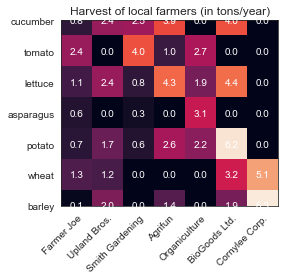

In [87]:
vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()